### Expected - observed 

Figure saved successfully at: C:/Users/maliz/thesa/UKbiobank/plots_for_thesis/expected_minus_observed_differences_olida_all.png


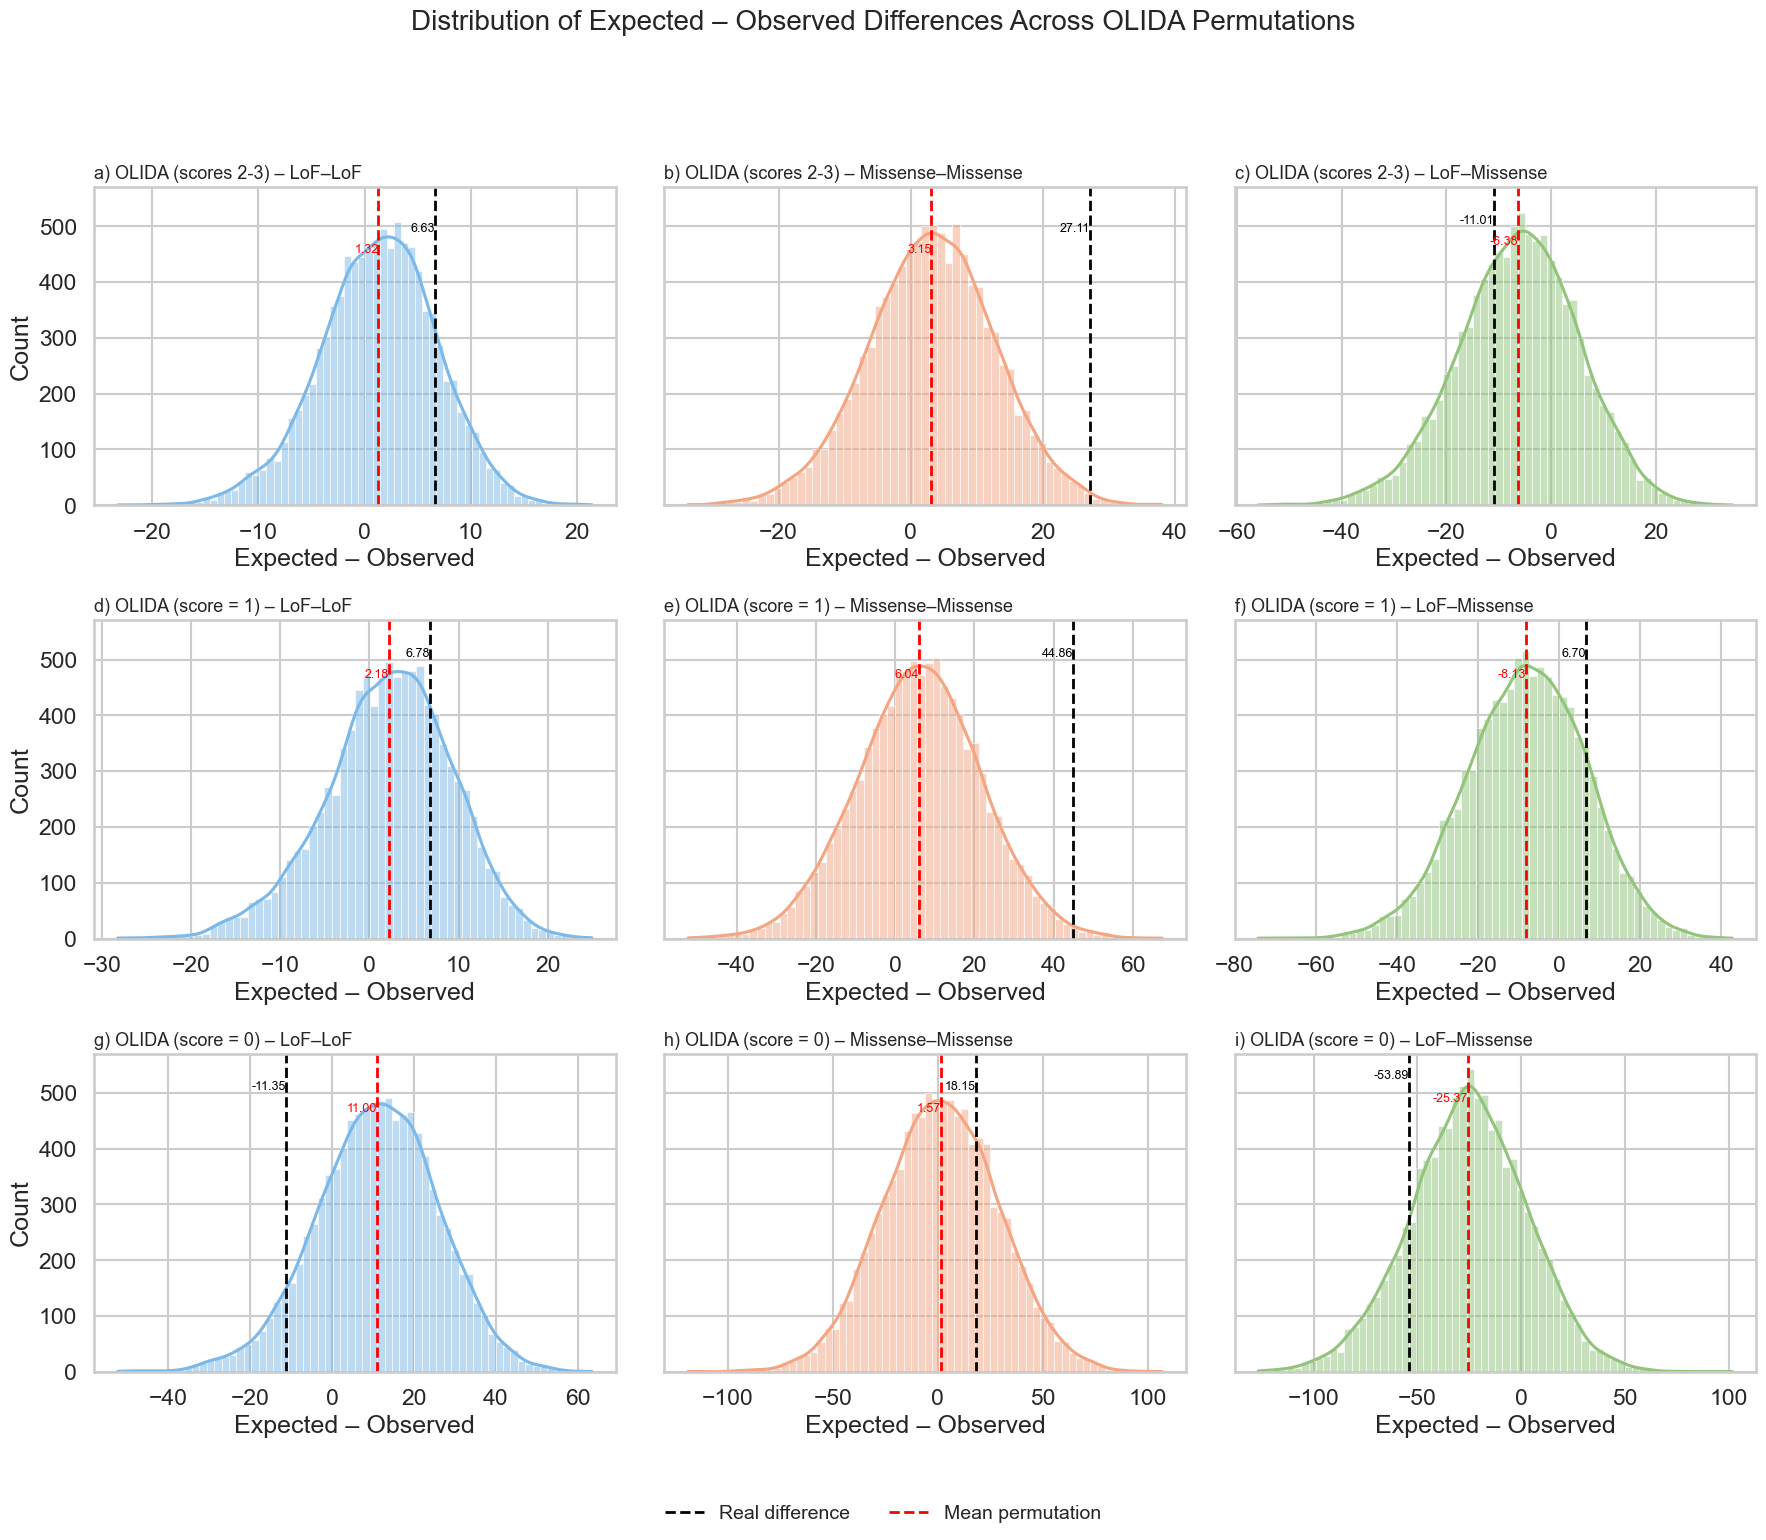

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid", context="talk")

# --- Define dataset configurations (order: none → 1 → 0) ---
datasets = [
    {
        "label": "a–c",  # for clarity
        "perm_folder": "C:/Users/maliz/thesa/UKbiobank/data/permutation_olida",
        "paralog_folder": "C:/Users/maliz/thesa/UKbiobank/data/olida_result",
        "missense_file": "olida_missense_results.csv",
        "lof_file": "olida_lof_results.csv",
        "lof_miss_file": "olida_lof_missense_combined_results.csv",
        "title_prefix": "OLIDA (scores 2-3)"
    },
    {
        "label": "d–f",
        "perm_folder": "C:/Users/maliz/thesa/UKbiobank/data/permutation_olida_1_score",
        "paralog_folder": "C:/Users/maliz/thesa/UKbiobank/data/olida_result",
        "missense_file": "olida_missense_full_version_1_results.csv",
        "lof_file": "olida_lof_full_version_1_results.csv",
        "lof_miss_file": "olida_lof_missense_combined_full_version_1_results.csv",
        "title_prefix": "OLIDA (score = 1)"
    },
    {
        "label": "g–i",
        "perm_folder": "C:/Users/maliz/thesa/UKbiobank/data/permutation_olida_0_score",
        "paralog_folder": "C:/Users/maliz/thesa/UKbiobank/data/olida_result",
        "missense_file": "olida_missense_0_results.csv",
        "lof_file": "olida_lof_0_results.csv",
        "lof_miss_file": "olida_lof_missense_combined_0_results.csv",
        "title_prefix": "OLIDA (score = 0)"
    }
]

save_path = "C:/Users/maliz/thesa/UKbiobank/plots_for_thesis/expected_minus_observed_differences_olida_all.png"

# --- Helper function to compute observed and permutation differences ---
def compute_differences(paralog_folder, perm_folder, missense_file, lof_file, lof_miss_file):
    # Observed
    df_lof = pd.read_csv(os.path.join(paralog_folder, lof_file))[['expected_both_lof', 'both_lof']].sum()
    df_missense = pd.read_csv(os.path.join(paralog_folder, missense_file))[['expected_both_missense', 'both_missense']].sum()
    df_lof_miss = pd.read_csv(os.path.join(paralog_folder, lof_miss_file))[['expected_both_lof_missense_combined', 'both_lof_missense_combined']].sum()

    obs = {
        "LoF–LoF": df_lof['expected_both_lof'] - df_lof['both_lof'],
        "Missense–Missense": df_missense['expected_both_missense'] - df_missense['both_missense'],
        "LoF–Missense": df_lof_miss['expected_both_lof_missense_combined'] - df_lof_miss['both_lof_missense_combined']
    }

    # Permutations
    diff_lof, diff_miss, diff_lof_miss = [], [], []
    for filename in os.listdir(perm_folder):
        if filename.endswith(".csv"):
            df = pd.read_csv(os.path.join(perm_folder, filename))
            diff_lof.append((df['expected_both_lof'] - df['both_lof']).sum())
            diff_miss.append((df['expected_both_missense'] - df['both_missense']).sum())
            diff_lof_miss.append((df['expected_both_lof_missense_combined'] - df['both_lof_missense_combined']).sum())
    perm = {
        "LoF–LoF": diff_lof,
        "Missense–Missense": diff_miss,
        "LoF–Missense": diff_lof_miss
    }

    return obs, perm

# --- Helper plotting function ---
def plot_panel(ax, data, obs_value, title, color, letter):
    sns.histplot(data, kde=True, ax=ax, color=color)
    ax.axvline(obs_value, color='black', linestyle='--', linewidth=2, label='Real difference')
    ax.axvline(np.mean(data), color='red', linestyle='--', linewidth=2, label='Mean permutation')
    ax.text(obs_value, ax.get_ylim()[1]*0.92, f"{obs_value:.2f}", color='black', ha='right', fontsize=9)
    ax.text(np.mean(data), ax.get_ylim()[1]*0.85, f"{np.mean(data):.2f}", color='red', ha='right', fontsize=9)
    ax.set_title(f"{letter}) {title}", fontsize=13, loc='left')
    ax.set_xlabel("Expected – Observed")
    ax.set_ylabel("Count")

# --- Create 3x3 figure ---
fig, axs = plt.subplots(3, 3, figsize=(18, 15), sharey=True)
fig.suptitle("Distribution of Expected – Observed Differences Across OLIDA Permutations", fontsize=20, y=1.02)

# --- Define colors per column ---
colors = ["#7CB9E8", "#F4A582", "#92C47C"]
mutation_types = ["LoF–LoF", "Missense–Missense", "LoF–Missense"]

# --- Panel letters ---
letters = [chr(i) for i in range(97, 106)]  # a–i

# --- Loop over rows (datasets) and columns (mutation types) ---
panel_idx = 0
for row, ds in enumerate(datasets):
    obs, perm = compute_differences(ds["paralog_folder"], ds["perm_folder"],
                                   ds["missense_file"], ds["lof_file"], ds["lof_miss_file"])
    for col, mut_type in enumerate(mutation_types):
        plot_panel(axs[row, col], perm[mut_type], obs[mut_type],
                   f"{ds['title_prefix']} – {mut_type}", colors[col], letters[panel_idx])
        panel_idx += 1

# --- Shared legend ---
handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2, fontsize=14, frameon=False)

plt.tight_layout(rect=[0, 0.05, 1, 0.97])
fig.savefig(save_path, dpi=600, bbox_inches="tight")
print(f"Figure saved successfully at: {save_path}")

plt.show()


In [2]:
def empirical_p_value_right(obs, perm_diffs):
    perm_diffs = np.array(perm_diffs)
    extreme = np.sum(perm_diffs >= obs)   # right tail
    print (extreme)
    print  ((extreme + 1) / (len(perm_diffs) + 1))
    return (extreme + 1) / (len(perm_diffs) + 1)